In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


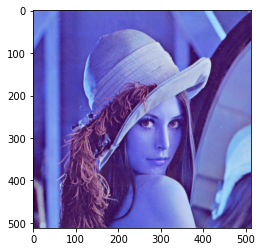

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
import random


imagec = cv2.imread('/content/drive/MyDrive/Colab Notebooks/lena.bmp')# My reference Image
plt.imshow(imagec)

In [ ]:
def RGBtoGRAY(image):
    return np.dot(image[...,:3], [0.3, 0.5, 0.2])


def gauss_noise_adder(image):
      row,col= image.shape
      mean = 0                        # mean of noise
      var = 0.01
      sigma = var**0.5                # standard deviation of noise
      gaussian = np.random.normal(mean,sigma,(row,col))
      gauss = gaussian.reshape(row,col)
      A = np.double(image)
      out = np.zeros(A.shape, np.double)
      normalized = cv2.normalize(A, out, 1.0, 0.0, cv2.NORM_MINMAX)
      noise = normalized+gauss
      noise=(noise*255).astype(np.uint8)
      return noise



def impulse_noise_adder(image):

    output = np.zeros(image.shape,np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < 0.41 and rdn > 0.40:
                output[j,i] = 0
            elif rdn > 0.50 and rdn < 0.51:
                output[j,i] = 255
            else:
                output[j,i] = image[j,i]
    return output


def convolve2D(image, kernel,padding=0):
    kernel = np.flipud(np.fliplr(kernel))

    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

  
    xOutput = int(((xImgShape - xKernShape + 2 * padding) ) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding)) + 1)
    output = np.zeros((xOutput, yOutput))

    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    for y in range(image.shape[1]):
        if y > image.shape[1] - yKernShape:
            break
        if y % 1 == 0:
            for x in range(image.shape[0]):
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    if x % 1 == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output


def gauss_kernel(K,std):
    left_lim=-2
    right_lim=2
    delta=(right_lim-left_lim)/K
    x = np.arange(left_lim, right_lim, delta)
    y = np.arange(left_lim,right_lim, delta)
    x2d, y2d = np.meshgrid(x, y)
    gauss_kernel = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * std ** 2))
    norm_gauss_kernel = gauss_kernel / (2 * np.pi * std ** 2)      # normalized
    return norm_gauss_kernel


def bilateral_kernel(K,std):
  temp=gauss_kernel(K,std)
  a,b=temp.shape
  temp[:,0:int(b/2)]=0
  return temp

def psnr(image1,image2,idx=1):
    if idx==1:
      PIXEL_MAX = 255.0
      return 20 * math.log10(PIXEL_MAX / math.sqrt(np.mean( (image1 - image2) ** 2 )))
    else:
      PIXEL_MAX = 255.0
      return 20 * math.log10(PIXEL_MAX / math.sqrt(np.mean( (image1[0:507,0:507] - image2[0:507,0:507]) ** 2 )))

In [ ]:
image=RGBtoGRAY(imagec)
image_gauss_noise=gauss_noise_adder(image)
image_impulse_noise=impulse_noise_adder(image)
K=6
std=1
padding=0
filter_gauss=gauss_kernel(K,std)
filter_bilateral=bilateral_kernel(K,std)

image_gauss_noise_deGaussed=convolve2D(image_gauss_noise, filter_gauss,padding)
image_gauss_noise_deBilateral=convolve2D(image_gauss_noise, filter_bilateral,padding)

image_impulse_noise_deGaussed=convolve2D(image_impulse_noise, filter_gauss,padding)
image_impulse_noise_deBilateral=convolve2D(image_impulse_noise, filter_bilateral,padding)


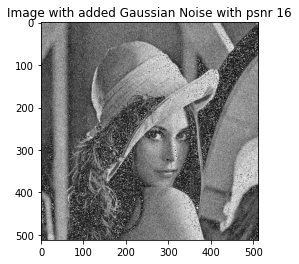

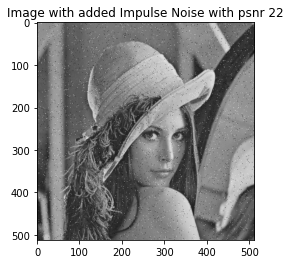

In [ ]:
psnr_gauss=psnr(image,image_gauss_noise)
psnr_impulse=psnr(image,image_impulse_noise)
plt.figure()
plt.title('Image with added Gaussian Noise with psnr %1.0f'%psnr_gauss)
plt.imshow(image_gauss_noise,cmap='gray')
plt.figure()
plt.title('Image with added Impulse Noise with psnr %1.0f'%psnr_impulse)
plt.imshow(image_impulse_noise,cmap='gray')

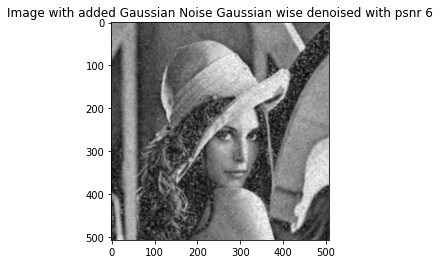

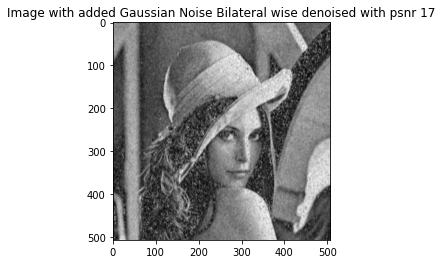

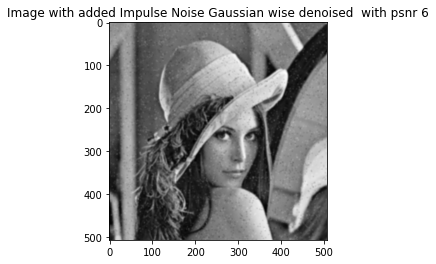

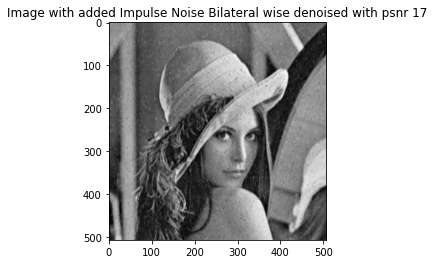

In [ ]:
psnr_gauss_deGaussed=psnr(image,image_gauss_noise_deGaussed,2)
psnr_gauss_deBilateral=psnr(image,image_gauss_noise_deBilateral,2)
psnr_impulse_deGaussed=psnr(image,image_impulse_noise_deGaussed,2)
psnr_impulse_deBilateral=psnr(image,image_impulse_noise_deBilateral,2)

plt.figure()
plt.title('Image with added Gaussian Noise Gaussian wise denoised with psnr %1.0f'%psnr_gauss_deGaussed)
plt.imshow(image_gauss_noise_deGaussed,cmap='gray')

plt.figure()
plt.title('Image with added Gaussian Noise Bilateral wise denoised with psnr %1.0f'%psnr_gauss_deBilateral)
plt.imshow(image_gauss_noise_deBilateral,cmap='gray')

plt.figure()
plt.title('Image with added Impulse Noise Gaussian wise denoised  with psnr %1.0f'%psnr_impulse_deGaussed)
plt.imshow(image_impulse_noise_deGaussed,cmap='gray')

plt.figure()
plt.title('Image with added Impulse Noise Bilateral wise denoised with psnr %1.0f'%psnr_impulse_deBilateral)
plt.imshow(image_impulse_noise_deBilateral,cmap='gray')